<a href="https://colab.research.google.com/github/lucguittard/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Luc_Guittard_LS_DS_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [2]:
!pip install pandas==0.25.0 

In [0]:
# TODO - your code!

# 1) generate and numerically represent a CI
import pandas as pd
import numpy as np
from scipy import stats 

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', 
                 header=None,
                 names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synthetic-fuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])
df2 = df.replace({'?': np.nan, 'n':0, 'y':1})
df3 = df2.fillna(0)



In [4]:
np.mean(df3['education'])

0.3931034482758621

In [5]:
def support(column):
  return column.sum() 

bipart_support = df3.apply(support)
bipart_support

party                   republicanrepublicandemocratdemocratdemocratde...
handicapped-infants                                                   187
water-project                                                         195
budget                                                                253
physician-fee-freeze                                                  177
el-salvador-aid                                                       212
religious-groups                                                      272
anti-satellite-ban                                                    239
aid-to-contras                                                        242
mx-missile                                                            207
immigration                                                           216
synthetic-fuels                                                       150
education                                                             171
right-to-sue                          

In [6]:
#assuming 435 members of House..
print(171/435) #checks with output of np.mean(df3['education'])

len(df3['education']) # the sample size -> but 435 is actually the population.. 
                      #  so, need to generate a test sample based on the population's vote distribution
                      #  and then apply that to the confidence_interval fxn below
    
                      #***COME BACK***
                      #
                      #
print(df3.shape)  
df3.head()

0.3931034482758621
(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synthetic-fuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [7]:
#***making a sample, from the population distribution*** (more straightfoward than you thought)

sample1 = pd.DataFrame() #otherwise, you just wouldn't have 2 dimensions to work with
sample1['education']  = df3['education'].sample(80) #is import of random module not needed? Picked 80 as sample size as its a bit smaller than (pop.*0.2)
print(sample1.shape)
sample1.head() #so that makes a random sample of the chosen population data (here, votes/non-votes on the 'education' policy issue)

sample2 = pd.DataFrame()
sample2['education'] = df3['education'].sample(40)
print(sample2.shape)

sample1.head()

# time to take the confidence_interval

(80, 1)
(40, 1)


,education
32,0.0
363,0.0
23,0.0
204,1.0
426,0.0


In [8]:
# CI, contd. 

def confidence_interval(data, confidence_level=0.95):
  data = np.array(data)
  sample_mean = np.mean(data)
  sample_size = len(data)
  sample_std_dev = np.std(data, ddof=1)
  standard_error = sample_std_dev / (sample_size**.5)
  margin_of_error = standard_error * stats.t.ppf((1 + confidence_level) / 2.0, sample_size - 1)
  return (sample_mean, sample_mean - margin_of_error, sample_mean + margin_of_error)

CI = confidence_interval(df3['education']) #what does this mean? did I do this right? ddof is 1 for sure (only 1s and 0s in the column), 
                                     #  but what about making a sample assuming the the House members represent the population 
                                     # Takeaway: there is a 95% probability that the population mean will be found in the range
                                     #  from .347 to .439. 

CI2 = confidence_interval(sample1) #sample based 

print(("Confidence Interval for population distribution:", CI),
      ("Confidence Interval for sample distribution:", CI2),sep="\n") #sep="\n" for multiline printing

#interpreting results: as would be expected, there is a greater margin of error 
# for the confidence interval based on the sample distribution (CI2) than there is for that CI based on the population distribution

CI3 = confidence_interval(sample2)
print(CI3)  #and the margin of error only increases, this was from an n = 40  

('Confidence Interval for population distribution:', (0.3931034482758621, 0.3470219271785747, 0.43918496937314944))
('Confidence Interval for sample distribution:', (0.4375, 0.3264066495377982, 0.5485933504622018))
(0.4, 0.24132707032458217, 0.5586729296754178)


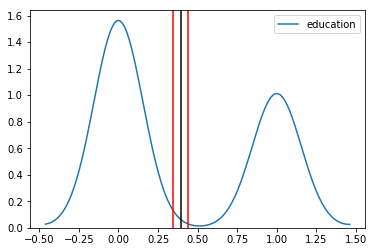

In [9]:
#Graphical rep of CI

import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(df3['education'])
plt.axvline(x=CI[1], color='red')  # =.347
plt.axvline(x=CI[2], color='red')  # =.439
plt.axvline(x=CI[0], color='k');   # =.393

In [10]:
# Run a chi-sqr test using twow cat. vars. from a previous course DF, 1st via numpy and 2nd via Scipy (one-liner) 

forest_fires = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')

print(df.shape)
forest_fires.head()
#forest_fires.isna().sum() #clean

(435, 17)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [0]:
#forest_fires.sort_values(by='rain', ascending=True)

In [12]:
# numpy method of X2: 
temp_bins = pd.cut(forest_fires['temp'],bins = 5)
day_temp_ct = pd.crosstab(forest_fires['day'],temp_bins, margins = True) #trouble introducing margins...
                                          
day_temp_ct  #the solution? staying with ver. 0.25.0 and just being sure to df.sort_values() - any column will do

temp,"(2.169, 8.42]","(8.42, 14.64]","(14.64, 20.86]","(20.86, 27.08]","(27.08, 33.3]",All
day,,,,,,
fri,5,13,47,17,3,85
mon,8,17,27,18,4,74
sat,3,10,37,30,4,84
sun,4,19,32,33,7,95
thu,5,5,25,19,7,61
tue,3,6,30,21,4,64
wed,1,8,21,16,8,54
All,29,78,219,154,37,517


In [0]:
#day_temp_ct.dtypes -> all int64s ; 

In [27]:
row_sums = day_temp_ct.iloc[0:7, 5].values  #for DFs, pd.values effectively removes axes lables
col_sums = day_temp_ct.iloc[7, 0:5].values
print(row_sums)
print(col_sums)

[85 74 84 95 61 64 54]
[ 29  78 219 154  37]


In [28]:
total = day_temp_ct.loc['All','All']
total

517

In [29]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total # eg. expected_value0 = 85*29/517 = 4.768 ->see below
    expected_row.append(expected_val)
  expected.append(expected_row)
  

expected = np.array(expected)
print(expected.shape)   #matches day_temp_ct shape
print(expected)  

#so the output represents the expected values assuming a normal distribution? 

(7, 5)
[[ 4.76789168 12.82398453 36.00580271 25.31914894  6.08317215]
 [ 4.15087041 11.16441006 31.34622824 22.04255319  5.2959381 ]
 [ 4.71179884 12.67311412 35.58220503 25.0212766   6.01160542]
 [ 5.32882012 14.33268859 40.2417795  28.29787234  6.79883946]
 [ 3.42166344  9.20309478 25.83945841 18.17021277  4.3655706 ]
 [ 3.58994197  9.655706   27.11025145 19.06382979  4.58027079]
 [ 3.02901354  8.14700193 22.87427466 16.08510638  3.86460348]]


In [30]:
observed = pd.crosstab(forest_fires['day'],temp_bins).values  
print(observed.shape)
observed

(7, 5)


array([[ 5, 13, 47, 17,  3],
       [ 8, 17, 27, 18,  4],
       [ 3, 10, 37, 30,  4],
       [ 4, 19, 32, 33,  7],
       [ 5,  5, 25, 19,  7],
       [ 3,  6, 30, 21,  4],
       [ 1,  8, 21, 16,  8]])

In [31]:
chi_squared = ((observed - expected)**2/(expected)).sum()  #refer to chi-sq formula for breakdown
print(f"Chi-Squared: {chi_squared}")

dof = (len(row_sums)-1)*(len(col_sums)-1)  #(dof or degrees of freedom) = n - 1
print(f"Degrees of Freedom: {dof}")   


#chi_sqr - it is value that represents the deviation(**2) b/w null- and alt- hypotheses; so Chi is just the simple directional deviation between the two
#  "It is also called a "goodness of fit" statistic, because it measures how well the observed distribution 
#   of data fits with the distribution that is expected if the variables are independent" (https://www.ling.upenn.edu/~clight/chisquared.htm). 
#  Here, the chi-sqr value (of 35.48) is not itself all that interesting. 
#  Instead, its value lies in its use, along with the dof value, to calculate the p-value.  

Chi-Squared: 35.48277261049192
Degrees of Freedom: 24


In [42]:
#running the chi-sq using Scipy

chi_squared, p_value, dof, expected = stats.chi2_contingency(observed) #observed = pd.crosstab(observed x, observed y).values 

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")  # cool, so the f placed at the start serves to call { } -ed values, defined by the scipy function above 
print("Expected: \n", np.array(expected))

#respectably low p-value; I'd say its cause enough to lend repute to the alt hypothesis, that the two categorical variables tested here
# are not independent of one another

Chi-Squared: 35.48277261049192
P-value: 0.06155618202812575
Degrees of Freedom: 24
Expected: 
 [[ 4.76789168 12.82398453 36.00580271 25.31914894  6.08317215]
 [ 4.15087041 11.16441006 31.34622824 22.04255319  5.2959381 ]
 [ 4.71179884 12.67311412 35.58220503 25.0212766   6.01160542]
 [ 5.32882012 14.33268859 40.2417795  28.29787234  6.79883946]
 [ 3.42166344  9.20309478 25.83945841 18.17021277  4.3655706 ]
 [ 3.58994197  9.655706   27.11025145 19.06382979  4.58027079]
 [ 3.02901354  8.14700193 22.87427466 16.08510638  3.86460348]]


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish for non-partisan news outlets).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)